# Part 1

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
infile = 'data/Teams.csv'
bball = pd.read_csv(infile)
bball.head(5)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [10]:
def select_year_range(df, start_year, end_year=10000):
    """
    Returns rows of dataframe df whose yearID lies in given range of years.
    """
    return df[(df['yearID'] >= start_year) & (df['yearID'] <= end_year)]
bball_df = select_year_range(bball, 2000)
print (bball_df.head(5))
print('Nbr records in original dataframe: {0}'.format(len(bball)))
print('Nbr records since 2000: {0}'.format(len(bball_df)))

      yearID lgID teamID franchID divID  Rank    G  Ghome   W   L  ...     DP  \
2325    2000   AL    ANA      ANA     W     3  162   81.0  82  80  ...  182.0   
2326    2000   NL    ARI      ARI     W     3  162   81.0  85  77  ...  138.0   
2327    2000   NL    ATL      ATL     E     1  162   81.0  95  67  ...  138.0   
2328    2000   AL    BAL      BAL     E     4  162   81.0  74  88  ...  151.0   
2329    2000   AL    BOS      BOS     E     2  162   81.0  85  77  ...  120.0   

         FP                  name                         park  attendance  \
2325  0.978        Anaheim Angels   Edison International Field   2066982.0   
2326  0.982  Arizona Diamondbacks            Bank One Ballpark   2942251.0   
2327  0.979        Atlanta Braves                 Turner Field   3234304.0   
2328  0.981     Baltimore Orioles  Oriole Park at Camden Yards   3297031.0   
2329  0.982        Boston Red Sox               Fenway Park II   2585895.0   

      BPF  PPF  teamIDBR  teamIDlahman45  te

In [11]:
bball_df = bball_df[['yearID', 'R', 'RA', 'W', 'L', 'LgWin']]
bball_df.head(5)

,yearID,R,RA,W,L,LgWin
2325,2000,864,869,82,80,N
2326,2000,792,754,85,77,N
2327,2000,810,714,95,67,N
2328,2000,794,913,74,88,N
2329,2000,792,745,85,77,N


In [12]:
bball_df.dropna(how='any')
print('Nbr records with valid data since 2000: {0}'.format(len(bball_df)))

Nbr records with valid data since 2000: 510


In [13]:
pd.options.mode.chained_assignment = None
bball_df['WinPct'] = bball_df.W / (bball_df.W + bball_df.L).astype(float)
bball_df['RunPct'] = bball_df.R / (bball_df.RA).astype(float)
bball_df.head(5)

,yearID,R,RA,W,L,LgWin,WinPct,RunPct
2325,2000,864,869,82,80,N,0.506173,0.994246
2326,2000,792,754,85,77,N,0.524691,1.050398
2327,2000,810,714,95,67,N,0.586420,1.134454
2328,2000,794,913,74,88,N,0.456790,0.869660
2329,2000,792,745,85,77,N,0.524691,1.063087


In [14]:
cols = ['yearID', 'R', 'RA', 'RunPct', 'W', 'L', 'WinPct', 'LgWin']
bball_df = bball_df[cols]
bball_df.head(5)

,yearID,R,RA,RunPct,W,L,WinPct,LgWin
2325,2000,864,869,0.994246,82,80,0.506173,N
2326,2000,792,754,1.050398,85,77,0.524691,N
2327,2000,810,714,1.134454,95,67,0.586420,N
2328,2000,794,913,0.869660,74,88,0.456790,N
2329,2000,792,745,1.063087,85,77,0.524691,N


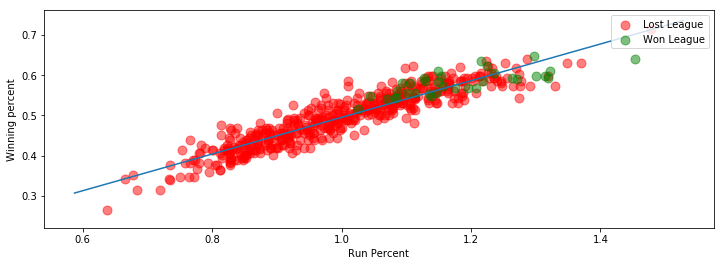

In [15]:
def vis1():
    # scatterplot
    won_league = bball_df[bball_df.LgWin == 'Y']
    lost_league = bball_df[bball_df.LgWin == 'N']
    fig, axes = plt.subplots(figsize=(12,4))
    legendStr = ['Won League', 'Lost League']
    axes.scatter(lost_league.RunPct, lost_league.WinPct, c='r', s=80, alpha=0.5, label=legendStr[1])
    axes.scatter(won_league.RunPct, won_league.WinPct, c='g', s=80, alpha=0.5, label=legendStr[0])
    # best-fit line
    m, b = np.polyfit(bball_df.RunPct, bball_df.WinPct, 1)  # slope, intercept
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')
    # labels and legend
    axes.legend(loc='upper right')
    axes.set_ylabel('Winning percent')
    axes.set_xlabel('Run Percent')
    plt.show()
    
vis1()

# Part 2

In [16]:
infile = 'data/Teams.csv'
bball = pd.read_csv(infile)
bball.head(5)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [17]:
def select_year_range(df, start_year, end_year=10000):
    """
    Returns rows of dataframe df whose yearID lies in given range of years.
    """
    return df[(df['yearID'] >= start_year) & (df['yearID'] <= end_year)]
bball_df = select_year_range(bball, 2000)
print (bball_df.head(5))
print('Nbr records in original dataframe: {0}'.format(len(bball)))
print('Nbr records since 2000: {0}'.format(len(bball_df)))

      yearID lgID teamID franchID divID  Rank    G  Ghome   W   L  ...     DP  \
2325    2000   AL    ANA      ANA     W     3  162   81.0  82  80  ...  182.0   
2326    2000   NL    ARI      ARI     W     3  162   81.0  85  77  ...  138.0   
2327    2000   NL    ATL      ATL     E     1  162   81.0  95  67  ...  138.0   
2328    2000   AL    BAL      BAL     E     4  162   81.0  74  88  ...  151.0   
2329    2000   AL    BOS      BOS     E     2  162   81.0  85  77  ...  120.0   

         FP                  name                         park  attendance  \
2325  0.978        Anaheim Angels   Edison International Field   2066982.0   
2326  0.982  Arizona Diamondbacks            Bank One Ballpark   2942251.0   
2327  0.979        Atlanta Braves                 Turner Field   3234304.0   
2328  0.981     Baltimore Orioles  Oriole Park at Camden Yards   3297031.0   
2329  0.982        Boston Red Sox               Fenway Park II   2585895.0   

      BPF  PPF  teamIDBR  teamIDlahman45  te

In [18]:
bball_df = bball_df[['yearID', 'HA', 'SOA', 'FP', 'W', 'L', 'LgWin']]
bball_df.head(5)

,yearID,HA,SOA,FP,W,L,LgWin
2325,2000,1534,846,0.978,82,80,N
2326,2000,1441,1220,0.982,85,77,N
2327,2000,1428,1093,0.979,95,67,N
2328,2000,1547,1017,0.981,74,88,N
2329,2000,1433,1121,0.982,85,77,N


In [19]:
bball_df.dropna(how='any')
print('Nbr records with valid data since 2000: {0}'.format(len(bball_df)))

Nbr records with valid data since 2000: 510


In [20]:
pd.options.mode.chained_assignment = None
bball_df['WinPct'] = bball_df.W / (bball_df.W + bball_df.L).astype(float)
bball_df['PitcherPct'] = (bball_df.SOA / bball_df.HA).astype(float)
bball_df['DefCap'] = (bball_df.SOA / bball_df.HA)+bball_df.FP.astype(float)
bball_df.head(5)

,yearID,HA,SOA,FP,W,L,LgWin,WinPct,PitcherPct,DefCap
2325,2000,1534,846,0.978,82,80,N,0.506173,0.551499,1.529499
2326,2000,1441,1220,0.982,85,77,N,0.524691,0.846634,1.828634
2327,2000,1428,1093,0.979,95,67,N,0.586420,0.765406,1.744406
2328,2000,1547,1017,0.981,74,88,N,0.456790,0.657401,1.638401
2329,2000,1433,1121,0.982,85,77,N,0.524691,0.782275,1.764275


In [21]:
cols = ['yearID', 'HA', 'SOA', 'FP', 'PitcherPct', 'DefCap', 'W', 'L', 'WinPct', 'LgWin']
bball_df = bball_df[cols]
bball_df.head(5)

,yearID,HA,SOA,FP,PitcherPct,DefCap,W,L,WinPct,LgWin
2325,2000,1534,846,0.978,0.551499,1.529499,82,80,0.506173,N
2326,2000,1441,1220,0.982,0.846634,1.828634,85,77,0.524691,N
2327,2000,1428,1093,0.979,0.765406,1.744406,95,67,0.586420,N
2328,2000,1547,1017,0.981,0.657401,1.638401,74,88,0.456790,N
2329,2000,1433,1121,0.982,0.782275,1.764275,85,77,0.524691,N


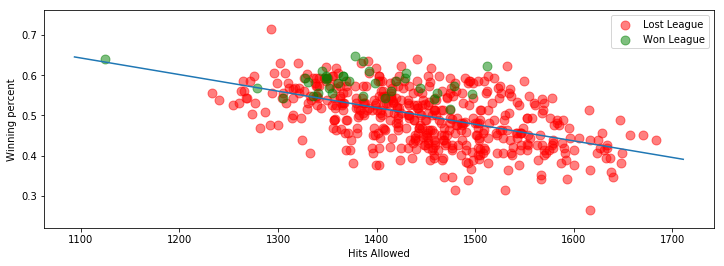

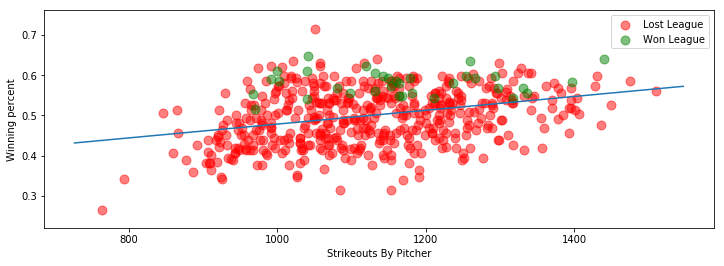

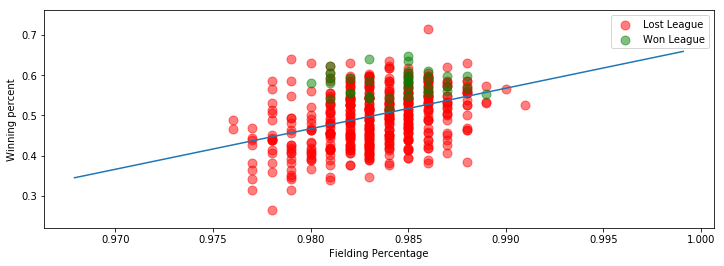

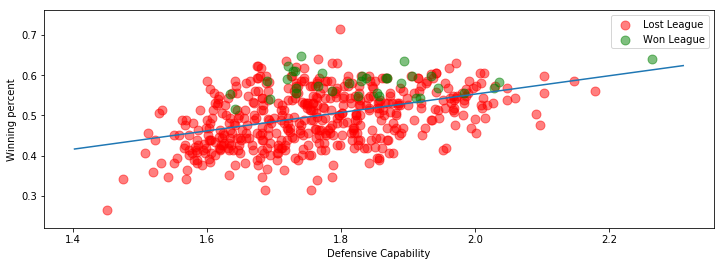

In [22]:
def vis1():
    # scatterplot
    won_league = bball_df[bball_df.LgWin == 'Y']
    lost_league = bball_df[bball_df.LgWin == 'N']
    fig, axes = plt.subplots(figsize=(12,4))
    legendStr = ['Won League', 'Lost League']
    axes.scatter(lost_league.HA, lost_league.WinPct, c='r', s=80, alpha=0.5, label=legendStr[1])
    axes.scatter(won_league.HA, won_league.WinPct, c='g', s=80, alpha=0.5, label=legendStr[0])
    # best-fit line
    m, b = np.polyfit(bball_df.HA, bball_df.WinPct, 1)  # slope, intercept
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')
    # labels and legend
    axes.legend(loc='upper right')
    axes.set_ylabel('Winning percent')
    axes.set_xlabel('Hits Allowed')
    plt.show()
    
vis1()

def vis2():
    # scatterplot
    won_league = bball_df[bball_df.LgWin == 'Y']
    lost_league = bball_df[bball_df.LgWin == 'N']
    fig, axes = plt.subplots(figsize=(12,4))
    legendStr = ['Won League', 'Lost League']
    axes.scatter(lost_league.SOA, lost_league.WinPct, c='r', s=80, alpha=0.5, label=legendStr[1])
    axes.scatter(won_league.SOA, won_league.WinPct, c='g', s=80, alpha=0.5, label=legendStr[0])
    # best-fit line
    m, b = np.polyfit(bball_df.SOA, bball_df.WinPct, 1)  # slope, intercept
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')
    # labels and legend
    axes.legend(loc='upper right')
    axes.set_ylabel('Winning percent')
    axes.set_xlabel('Strikeouts By Pitcher')
    plt.show()
    
vis2()

def vis3():
    # scatterplot
    won_league = bball_df[bball_df.LgWin == 'Y']
    lost_league = bball_df[bball_df.LgWin == 'N']
    fig, axes = plt.subplots(figsize=(12,4))
    legendStr = ['Won League', 'Lost League']
    axes.scatter(lost_league.FP, lost_league.WinPct, c='r', s=80, alpha=0.5, label=legendStr[1])
    axes.scatter(won_league.FP, won_league.WinPct, c='g', s=80, alpha=0.5, label=legendStr[0])
    # best-fit line
    m, b = np.polyfit(bball_df.FP, bball_df.WinPct, 1)  # slope, intercept
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')
    # labels and legend
    axes.legend(loc='upper right')
    axes.set_ylabel('Winning percent')
    axes.set_xlabel('Fielding Percentage')
    plt.show()
    
vis3()

def vis4():
    # scatterplot
    won_league = bball_df[bball_df.LgWin == 'Y']
    lost_league = bball_df[bball_df.LgWin == 'N']
    fig, axes = plt.subplots(figsize=(12,4))
    legendStr = ['Won League', 'Lost League']
    axes.scatter(lost_league.DefCap, lost_league.WinPct, c='r', s=80, alpha=0.5, label=legendStr[1])
    axes.scatter(won_league.DefCap, won_league.WinPct, c='g', s=80, alpha=0.5, label=legendStr[0])
    # best-fit line
    m, b = np.polyfit(bball_df.DefCap, bball_df.WinPct, 1)  # slope, intercept
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')
    # labels and legend
    axes.legend(loc='upper right')
    axes.set_ylabel('Winning percent')
    axes.set_xlabel('Defensive Capability')
    plt.show()
    
vis4()

### The previous charts demonstrate the correlation between:

1. Winning Percentage and Hits Allowed
2. Winning Percentage and Strikeouts By Pitcher
3. Winning Percentage and Fielding Percentage
4. Winning Percentage and Defensive Capability

### This demonstrates that the lower the amount of hits, the greater the strikeouts and the higher the fielding percentage resulted in a greater winning percentage. 
### The calculation for Defensive Capability was done with relation to the a "Pitching Percentage" that calculated the number of strikeouts from the pitcher vs the number of hits that were allowed. 
### "Defensive Capability" was found from the addition of the pitching percentage and the fielding percentage to provide an overall view. 
## This proves that the greater the percentage of pitching and fielding, the higher the winning percentage of the team. This could result from a higher number of strikeouts in correlation to a lower number of hits allowed and a high fielding percentage.  